In [4]:
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/Vehicle.zip -d /content/Vehicle

Mounted at /content/drive
Archive:  /content/drive/MyDrive/Vehicle.zip
  inflating: /content/Vehicle/airplanes/airplane1.jpg  
  inflating: /content/Vehicle/airplanes/airplane10.jpg  
  inflating: /content/Vehicle/airplanes/airplane100.jpg  
  inflating: /content/Vehicle/airplanes/airplane1000.jpg  
  inflating: /content/Vehicle/airplanes/airplane101.jpg  
  inflating: /content/Vehicle/airplanes/airplane102.jpg  
  inflating: /content/Vehicle/airplanes/airplane103.jpg  
  inflating: /content/Vehicle/airplanes/airplane104.jpg  
  inflating: /content/Vehicle/airplanes/airplane105.jpg  
  inflating: /content/Vehicle/airplanes/airplane106.jpg  
  inflating: /content/Vehicle/airplanes/airplane107.jpg  
  inflating: /content/Vehicle/airplanes/airplane108.jpg  
  inflating: /content/Vehicle/airplanes/airplane109.jpg  
  inflating: /content/Vehicle/airplanes/airplane11.jpg  
  inflating: /content/Vehicle/airplanes/airplane110.jpg  
  inflating: /content/Vehicle/airplanes/airplane111.jpg  
  in

In [1]:
import os
import tensorflow as tf
import numpy as np

In [2]:
DATASET_PATH = "Vehicle"
images = []
classes =[]
class_list = []

target_size = (250, 250)

In [5]:
for i, classname in enumerate(os.listdir(DATASET_PATH)):
    class_list.append(classname)
    for j, filename in enumerate(os.listdir(os.path.join(DATASET_PATH, classname))):
        image = tf.keras.utils.load_img(os.path.join(DATASET_PATH, classname, filename), color_mode = "grayscale", target_size = target_size)
        image = tf.keras.utils.img_to_array(image)
        image /= 255
        images.append(image)
        classes.append(i)

In [6]:
images = np.array(images)
classes = np.array(classes)

In [7]:
y = tf.keras.utils.to_categorical(classes, num_classes = len(class_list))
y.shape

(3000, 3)

# Model

In [8]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [26]:
x_train, x_temp, y_train, y_temp = train_test_split(images, y, train_size=0.8)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, train_size=0.5)

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu",  input_shape = (x_train[0].shape)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size = (5, 5), strides = (2, 2), padding = "same", activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size = (5, 5), strides = (1, 1), padding = "same", activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dropout(rate = 0.1),
    tf.keras.layers.Dense(len(class_list), activation = "softmax")
])

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 250, 250, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 125, 125, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 63, 63, 32)          │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 31, 31, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │         460,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 538,563 (2.05 MB)

 Trainable params: 538,563 (2.05 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
hist = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, batch_size = 75)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - accuracy: 0.4492 - loss: 1.0322 - val_accuracy: 0.7933 - val_loss: 0.6192
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.7442 - loss: 0.6185 - val_accuracy: 0.8667 - val_loss: 0.4407
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.8310 - loss: 0.4521 - val_accuracy: 0.8933 - val_loss: 0.3292
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.8788 - loss: 0.3416 - val_accuracy: 0.9100 - val_loss: 0.2694
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.8846 - loss: 0.3152 - val_accuracy: 0.8867 - val_loss: 0.2803
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.8829 - loss: 0.2829 - val_accuracy: 0.8933 - val_loss: 0.2659
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9189 - loss: 0.2124 - val_accuracy: 0.9167 - val_loss: 0.2476
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9365 - loss: 0.1871 - val_accuracy: 0.

In [48]:
for i in range(20):
    img = np.expand_dims(x_test[i], axis = 0)
    pred = model.predict(img)

    print(f"Sample {i}: Actual Label = {class_list[np.argmax(y_test[i])]}, Predicted Label = {class_list[np.argmax(pred)]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Sample 0: Actual Label = cars, Predicted Label = cars
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sample 1: Actual Label = airplanes, Predicted Label = airplanes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sample 2: Actual Label = airplanes, Predicted Label = cars
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Sample 3: Actual Label = ship, Predicted Label = ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Sample 4: Actual Label = airplanes, Predicted Label = airplanes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sample 5: Actual Label = ship, Predicted Label = ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Sample 6: Actual Label = airplanes, Predicted Label = airplanes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Sample 7: Actual Label = cars, Predicted Label = cars
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Sample 8: Actual Label = cars, Predicted Label = cars
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Sample 9: Actual Label = ship, Predicted Label = ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Sample

In [49]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 1)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9355 - loss: 0.1824
Loss: 0.19455735385417938
Accuracy: 0.9333333373069763


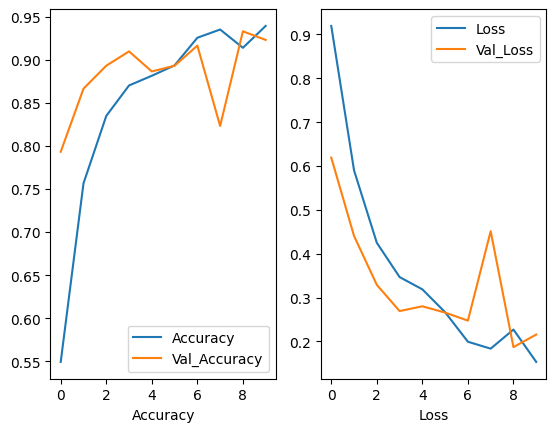

In [50]:
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.legend(['Accuracy', "Val_Accuracy"])

plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend(['Loss', "Val_Loss"])

plt.show()